<center><h1> IFT-6758  Data Science  </h1></center>
<center><h2> Fall - 2020 </h2></center> 
<center><h3> Kaggle Competition</h3></center> 
<center><h3> </h3></center> 
<center><h3> Prediction Program</h3></center> 



**Instructions**


1.   Find the best amound of features to be selected
2.   Go to the Predict Kaggle Data Section and run the code to get test values



# Read train data

In [226]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import sklearn
%matplotlib inline

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import minmax_scale

In [227]:
train_data = pd.read_pickle("train_cleaned_fixed.pkl")
test_data = pd.read_pickle("test_cleaned_fixed.pkl")
id_test = test_data['Id']
train_data

,Id,Personal URL,Profile Cover Image Status,Profile Text Color R,Profile Text Color G,Profile Text Color B,Profile Page Color R,Profile Page Color G,Profile Page Color B,Profile Theme Color R,Profile Theme Color G,Profile Theme Color B,Is Profile View Size Customized?,Location Public Visibility,Profile Creation Month,Profile Creation Day,Profile Creation WeekDay,Profile Creation Hour,User Language,Num of Followers,Num of People Following,Num of Status Updates,Num of Direct Messages,Avg Daily Profile Visit Duration in seconds,Avg Daily Profile Clicks,Profile Image,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,-39600,-36000,-28800,-25200,-21600,-18000,-14400,-10800,-7200,0,3600,7200,10800,14400,16200,18000,19800,21600,25200,28800,32400,36000,37800,39600,46800,Not verified,Pending,Verified,business,celebrity,government,unknown,Num of Profile Likes
2,JS49LP5P72RI1OQB,0,1,0.12,0.76,0.87,0.94,0.94,0.94,0.12,0.76,0.87,0,1,10,2,4,20,6,4.128561,3.273464,3.672005,2.357935,1.518514,0.301030,JS49LP5P72RI1OQB.png,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,3.193125
4,CRSEMK4QER6LDJSA,1,1,0.35,0.26,0.30,0.97,0.97,0.97,0.00,0.00,0.00,0,1,3,31,1,13,6,3.964542,1.973128,3.514813,2.117271,0.954243,0.698970,CRSEMK4QER6LDJSA.png,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,3.033021
5,0FEKBQ59AF1LQKJP,1,1,0.00,0.49,0.76,0.87,0.93,0.96,0.20,0.58,0.82,0,1,9,30,3,17,6,4.709160,2.372912,4.200905,2.671173,1.518514,0.301030,0FEKBQ59AF1LQKJP.png,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,2.230449
8,ORJN6I5G6NA6QD0Q,0,1,0.96,0.67,0.71,0.88,0.88,0.88,0.88,0.80,0.88,0,0,5,25,0,23,6,4.281283,2.149219,3.427811,2.320146,1.322219,0.845098,ORJN6I5G6NA6QD0Q.png,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,3.093071
9,5JIAFD6132MNPAL9,0,1,0.11,0.63,0.95,0.87,0.93,0.96,0.75,0.87,0.93,1,1,10,17,0,14,6,5.899709,2.869818,4.287174,2.380211,1.544068,0.602060,5JIAFD6132MNPAL9.png,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,2.722634
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7490,EQM27ASK6HGQHDTB,0,1,0.11,0.63,0.95,0.87,0.93,0.96,0.75,0.87,0.93,1,1,2,24,3,21,8,3.386677,2.996512,3.800648,1.662758,1.462398,0.477121,EQM27ASK6HGQHDTB.png,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,3.820661
7492,3QIOBBC2TCMCMOM8,0,1,0.00,0.52,0.71,0.87,0.93,0.96,0.75,0.87,0.93,0,0,8,1,0,6,6,4.893079,2.484300,3.926805,2.459392,1.531479,0.477121,3QIOBBC2TCMCMOM8.png,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,3.388101
7494,QSFDKHOHMHRNGS65,1,1,0.00,0.52,0.71,0.87,0.93,0.96,0.75,0.87,0.93,0,1,7,12,1,21,6,5.948095,2.290035,3.417638,3.085291,1.361728,0.301030,QSFDKHOHMHRNGS65.png,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,2.588832
7495,KP5DR7CTN8CNLG8P,0,0,0.29,0.03,0.03,0.87,0.93,0.96,0.00,0.00,0.00,0,0,1,20,3,20,6,3.784403,1.886491,2.993877,1.755875,1.414973,0.954243,KP5DR7CTN8CNLG8P.png,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,3.137987


In [228]:
train_data.drop(columns=['Id', 'Profile Image'], inplace=True)
test_data.drop(columns=['Id', 'Profile Image'], inplace=True)
train_data

,Personal URL,Profile Cover Image Status,Profile Text Color R,Profile Text Color G,Profile Text Color B,Profile Page Color R,Profile Page Color G,Profile Page Color B,Profile Theme Color R,Profile Theme Color G,Profile Theme Color B,Is Profile View Size Customized?,Location Public Visibility,Profile Creation Month,Profile Creation Day,Profile Creation WeekDay,Profile Creation Hour,User Language,Num of Followers,Num of People Following,Num of Status Updates,Num of Direct Messages,Avg Daily Profile Visit Duration in seconds,Avg Daily Profile Clicks,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,-39600,-36000,-28800,-25200,-21600,-18000,-14400,-10800,-7200,0,3600,7200,10800,14400,16200,18000,19800,21600,25200,28800,32400,36000,37800,39600,46800,Not verified,Pending,Verified,business,celebrity,government,unknown,Num of Profile Likes
2,0,1,0.12,0.76,0.87,0.94,0.94,0.94,0.12,0.76,0.87,0,1,10,2,4,20,6,4.128561,3.273464,3.672005,2.357935,1.518514,0.301030,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,3.193125
4,1,1,0.35,0.26,0.30,0.97,0.97,0.97,0.00,0.00,0.00,0,1,3,31,1,13,6,3.964542,1.973128,3.514813,2.117271,0.954243,0.698970,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,3.033021
5,1,1,0.00,0.49,0.76,0.87,0.93,0.96,0.20,0.58,0.82,0,1,9,30,3,17,6,4.709160,2.372912,4.200905,2.671173,1.518514,0.301030,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,2.230449
8,0,1,0.96,0.67,0.71,0.88,0.88,0.88,0.88,0.80,0.88,0,0,5,25,0,23,6,4.281283,2.149219,3.427811,2.320146,1.322219,0.845098,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,3.093071
9,0,1,0.11,0.63,0.95,0.87,0.93,0.96,0.75,0.87,0.93,1,1,10,17,0,14,6,5.899709,2.869818,4.287174,2.380211,1.544068,0.602060,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,2.722634
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7490,0,1,0.11,0.63,0.95,0.87,0.93,0.96,0.75,0.87,0.93,1,1,2,24,3,21,8,3.386677,2.996512,3.800648,1.662758,1.462398,0.477121,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,3.820661
7492,0,1,0.00,0.52,0.71,0.87,0.93,0.96,0.75,0.87,0.93,0,0,8,1,0,6,6,4.893079,2.484300,3.926805,2.459392,1.531479,0.477121,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,3.388101
7494,1,1,0.00,0.52,0.71,0.87,0.93,0.96,0.75,0.87,0.93,0,1,7,12,1,21,6,5.948095,2.290035,3.417638,3.085291,1.361728,0.301030,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,2.588832
7495,0,0,0.29,0.03,0.03,0.87,0.93,0.96,0.00,0.00,0.00,0,0,1,20,3,20,6,3.784403,1.886491,2.993877,1.755875,1.414973,0.954243,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,3.137987


In [229]:
#Facultatif
#train_data.drop(columns=['Profile Creation Month', 'Profile Creation Day', 'Profile Creation WeekDay', 'Profile Creation Hour', 'User Language'], inplace=True)
#test_data.drop(columns=['Profile Creation Month', 'Profile Creation Day', 'Profile Creation WeekDay', 'Profile Creation Hour', 'User Language'], inplace=True)

In [230]:
#Temp drop
#train_data.drop(columns=["Num of Followers", "Num of People Following", "Num of Status Updates", "Num of Direct Messages"], inplace=True)
#train_data = train_data[["Num of Followers", "Num of People Following", "Num of Status Updates", "Num of Direct Messages", "Num of Profile Likes"]]
#train_data = train_data[["Is Profile View Size Customized?", "Avg Daily Profile Visit Duration in seconds", "Profile Creation WeekDay", "Avg Daily Profile Clicks", "Num of Profile Likes"]]
#train_data = train_data[["Num of People Following", "Avg Daily Profile Clicks", "Num of Profile Likes"]]
#train_data = train_data[["Num of People Following", "Num of Status Updates", "Num of Profile Likes"]]

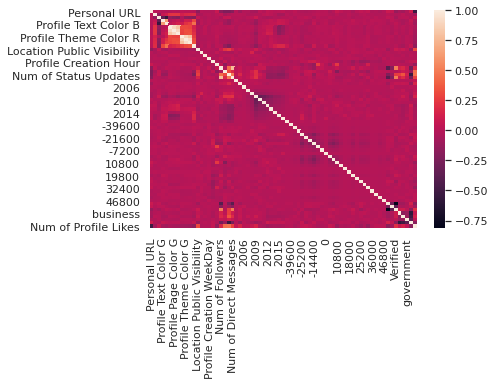

In [231]:
corr =train_data.corr()
sns.heatmap(corr)

In [232]:
cor_data = train_data
cor_data.dtypes

Personal URL                    int64
Profile Cover Image Status      int64
Profile Text Color R          float64
Profile Text Color G          float64
Profile Text Color B          float64
                               ...   
business                        uint8
celebrity                       uint8
government                      uint8
unknown                         uint8
Num of Profile Likes          float64
Length: 69, dtype: object

In [233]:
train = cor_data.to_numpy()
Y_likes = train[:, -1] # for last column
X_likes = train[:, :-1] # for all but last column

X_Kaggle = test_data.to_numpy()

X_likes_scaled = minmax_scale(X_likes)

In [234]:
columnsNamesArr = cor_data.columns.values
labels = columnsNamesArr[:-1]

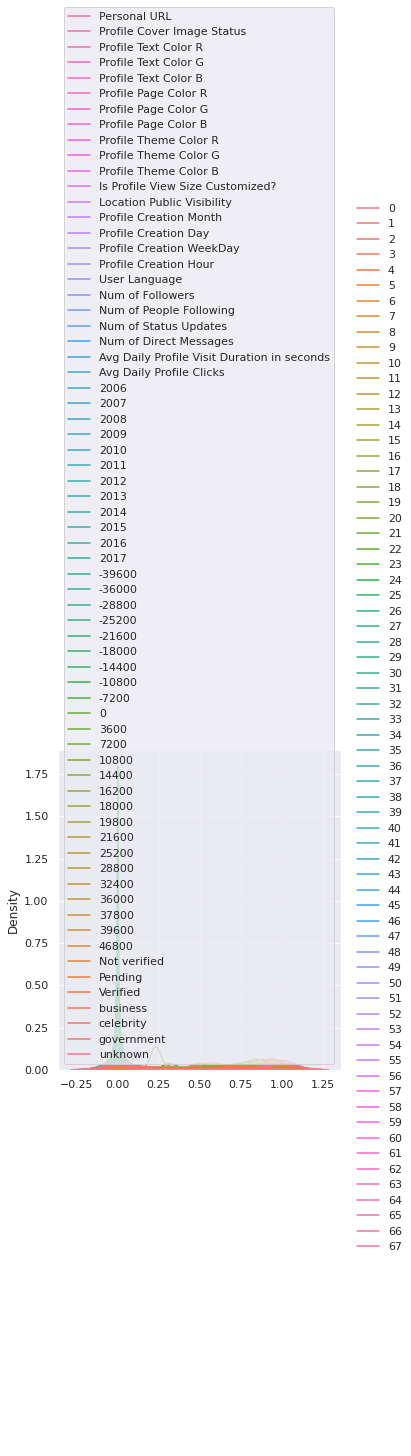

In [235]:
sns.displot(data=X_likes_scaled, kind='kde', legend=True);
plt.legend(labels)


**Scaling and selecting features**

In [242]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression, mutual_info_regression
model = SelectKBest(f_regression, k=30)
X_selected_feat_likes = model.fit_transform(X_likes_scaled, Y_likes)
mask = np.array(model.get_support(indices=True))

selected_feats = [labels[l] for l in mask]
print(selected_feats)

['Personal URL', 'Profile Cover Image Status', 'Profile Text Color R', 'Profile Text Color G', 'Profile Text Color B', 'Profile Theme Color R', 'Profile Theme Color G', 'Profile Theme Color B', 'Is Profile View Size Customized?', 'Location Public Visibility', 'User Language', 'Num of Followers', 'Num of People Following', 'Num of Status Updates', 'Num of Direct Messages', 'Avg Daily Profile Clicks', 2008, 2009, 2012, -21600, 3600, 10800, 25200, 32400, 'Not verified', 'Pending', 'Verified', 'business', 'celebrity', 'unknown']


In [243]:
len(selected_feats)

30

**This was to find the best number of selected features, no need to run it every time**

In [194]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn import datasets, ensemble

best_i = 0
best_rmse = 10

for i in range(2, X_likes.shape[1]):

  X_selected_feat_likes = SelectKBest(f_regression, k=i).fit_transform(X_likes, Y_likes)
  X_selected_feat_likes.shape

  # split dataset to train and test
  X_train, X_test, y_train, y_test = train_test_split(X_selected_feat_likes, Y_likes, 
                                                      test_size=0.2, 
                                                      shuffle=True, 
                                                     random_state=42 #  To guarantee that the split will always be the same
                                                      )  

  
  #regressor = LinearRegression()
  #regressor.fit(X_train, y_train)

  regressor = XGBRegressor()
  regressor.fit(X_train,y_train , verbose=False)

  y_pred = regressor.predict(X_test)

  ## RMSE Metric
  from sklearn.metrics import mean_squared_error
  import math
  rmse = math.sqrt(mean_squared_error(y_test, y_pred))
  if rmse<best_rmse:
    best_rmse = rmse
    best_i = i
  print(f"RMSE -> {rmse}")
print(best_rmse)
print(best_i)


[01:10:26] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
RMSE -> 0.7351053005813967
[01:10:26] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
RMSE -> 0.7068050378674553
[01:10:26] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
RMSE -> 0.722368740968938
[01:10:26] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
RMSE -> 0.7570042716071265
[01:10:26] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
RMSE -> 0.6668737987498133
[01:10:26] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
RMSE -> 0.6926671008077723
[01:10:27] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linea

**Sklearn Pipeline**

In [149]:
from sklearn.model_selection import train_test_split

# split dataset to train and test
X_train, X_test, y_train, y_test = train_test_split(X_selected_feat_likes, Y_likes, 
                                                    test_size=0.2, 
                                                    shuffle=True, 
                                                    random_state=42 #  To guarantee that the split will always be the same
                                                    )  


**Linear Regression Classifier**

In [89]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
regressor = LinearRegression()
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

In [90]:
## RMSE Metric
from sklearn.metrics import mean_squared_error
import math
rmse = math.sqrt(mean_squared_error(y_test, y_pred))
print(f"RMSE -> {rmse}")

RMSE -> 0.6872110418519333


RMSE -> 0.7617407986671466

**Random Forest Classifier**

In [95]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor()
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

RMSE -> 0.7750671597407869

In [86]:
## RMSE Metric
from sklearn.metrics import mean_squared_error
import math
rmse = math.sqrt(mean_squared_error(y_test, y_pred))
print(f"RMSE -> {rmse}")

RMSE -> 0.6947209693855296


**XGBoost Regressor**

In [150]:
from xgboost import XGBRegressor
from sklearn import datasets, ensemble
from sklearn.ensemble import AdaBoostClassifier
"""
params = {'n_estimators': 2000,
          'max_depth': 10,
          'min_samples_split': 10,
          'learning_rate': 0.001}
XGBModel = ensemble.GradientBoostingRegressor(**params)
XGBModel.fit(X_train, y_train)
"""

regressor = XGBRegressor()
regressor.fit(X_train,y_train , verbose=False)

y_pred = regressor.predict(X_test)

[00:41:26] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


RMSE -> 0.7476484833959012

In [151]:
## RMSE Metric
from sklearn.metrics import mean_squared_error
import math
rmse = math.sqrt(mean_squared_error(y_test, y_pred))
print(f"RMSE -> {rmse}")

RMSE -> 0.678088906820589


**AdaBoost Regressor**


In [152]:
from sklearn.ensemble import AdaBoostRegressor
regressor = AdaBoostRegressor(random_state=0, n_estimators=100)
regressor.fit(X_train,y_train)

y_pred = regressor.predict(X_test)

In [153]:
## RMSE Metric
from sklearn.metrics import mean_squared_error
import math
rmse = math.sqrt(mean_squared_error(y_test, y_pred))
print(f"RMSE -> {rmse}")

RMSE -> 0.8011908329778494


**SVR Regressor**

In [ ]:
from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
regressor = make_pipeline(StandardScaler(), SVR(C=1.0, epsilon=0.2))
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

RMSE -> 0.7664196357813966

In [ ]:
## RMSE Metric
from sklearn.metrics import mean_squared_error
import math
rmse = math.sqrt(mean_squared_error(y_test, y_pred))
print(f"RMSE -> {rmse}")

RMSE -> 0.6828030588917052


**Gradient Boosting Regressor**

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
regressor = GradientBoostingRegressor(random_state=0)
regressor.fit(X_train,y_train)
y_pred = regressor.predict(X_test)

RMSE -> 0.7472080882179262

In [ ]:
## RMSE Metric
from sklearn.metrics import mean_squared_error
import math
rmse = math.sqrt(mean_squared_error(y_test, y_pred))
print(f"RMSE -> {rmse}")

**Cross-validation**

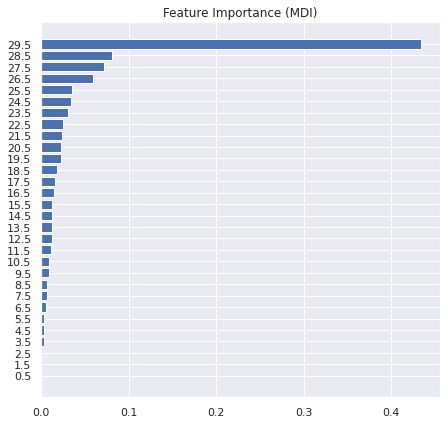

In [101]:
feature_importance = regressor.feature_importances_
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
fig = plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos)#, np.array(diabetes.feature_names)[sorted_idx])
plt.title('Feature Importance (MDI)')

#result = permutation_importance(reg, X_test, y_test, n_repeats=10,
#                                random_state=42, n_jobs=2)
#sorted_idx = result.importances_mean.argsort()
#plt.subplot(1, 2, 2)
#plt.boxplot(result.importances[sorted_idx].T,
#            vert=False, labels=np.array(diabetes.feature_names)[sorted_idx])
#plt.title("Permutation Importance (test set)")
fig.tight_layout()
plt.show()

**Cross-validation**

In [13]:
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error

def CV(Model, X, y, k=10, *model_args, **model_kwargs):
    validation_losses = []
    for train_index, test_index in KFold(k).split(y):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
        
        predictor = Model(*model_args, **model_kwargs)
        predictor.fit(X_train, y_train)
        y_pred = predictor.predict(X_test)
        
        validation_losses.append(np.sqrt(mean_squared_error(y_test, y_pred)))
    
    return np.array(validation_losses)

[22:59:46] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[22:59:46] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[22:59:47] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[22:59:47] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[22:59:47] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[22:59:48] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[22:59:48] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[22:59:48] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

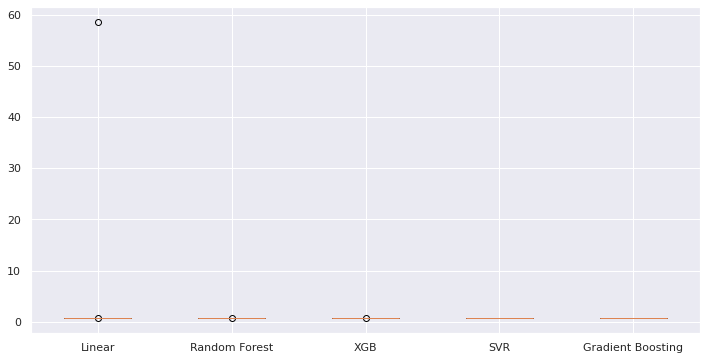

In [14]:
from sklearn.linear_model import LinearRegression

from sklearn.ensemble import RandomForestRegressor

from xgboost import XGBRegressor

from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

from sklearn.ensemble import GradientBoostingRegressor

K = 10

losses = []
labels = []

# Evaluate every model with CV
losses.append(CV(LinearRegression, X_train, y_train, K))
labels.append("Linear")

losses[-1] = np.where(losses[-1] > 100, np.median(losses[-1]), losses[-1])

losses.append(CV(RandomForestRegressor, X_train, y_train, K))
labels.append("Random Forest")

losses.append(CV(XGBRegressor, X_train, y_train, K))
labels.append("XGB")

losses.append(CV(make_pipeline, X_train, y_train, K, StandardScaler(), SVR(C=1.0, epsilon=0.2)))
labels.append("SVR")

losses.append(CV(GradientBoostingRegressor, X_train, y_train, K, random_state=0))
labels.append("Gradient Boosting")

plt.figure(figsize=(12,6))
plt.boxplot(losses, labels=labels)
plt.show()

**Testing with kera, not working for the moment**

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Flatten
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error 
from matplotlib import pyplot as plt
import seaborn as sb
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import warnings 
warnings.filterwarnings('ignore')
warnings.filterwarnings('ignore', category=DeprecationWarning)
from xgboost import XGBRegressor

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

NN_model = keras.Sequential()

# The Input Layer :
NN_model.add(layers.Dense(128, kernel_initializer='normal',input_dim = train.shape[1], activation='relu'))

# The Hidden Layers :
NN_model.add(layers.Dense(256, kernel_initializer='normal',activation='relu'))
NN_model.add(layers.Dense(256, kernel_initializer='normal',activation='relu'))
NN_model.add(layers.Dense(256, kernel_initializer='normal',activation='relu'))

# The Output Layer :
NN_model.add(layers.Dense(1, kernel_initializer='normal',activation='linear'))

# Compile the network :
NN_model.compile(loss='mean_absolute_error', optimizer='adam', metrics=['mean_absolute_error'])
NN_model.summary()

In [ ]:
checkpoint_name = 'Weights-{epoch:03d}--{val_loss:.5f}.hdf5' 
checkpoint = keras.callbacks.ModelCheckpoint(checkpoint_name, monitor='val_loss', verbose = 1, save_best_only = True, mode ='auto')
callbacks_list = [checkpoint]

In [ ]:
def get_data():

    #get train data
    train = pd.read_pickle("train_cleaned_colors.pkl")
    
    #get test data
    test = pd.read_pickle("test_cleaned_colors.pkl")

    return train , test

def get_combined_data():
  #reading train data
  train , test = get_data()

  target = train["Num of Profile Likes"]
  train.drop(['Num of Profile Likes', 'Profile Image', ],axis = 1 , inplace = True)
  train.drop(['Id'], inplace=True, axis=1)
  return train, target

#Load train and test data into pandas DataFrames
train_data, test = get_data()

#Combine train and test data to process them together
train, target = get_combined_data()

In [ ]:
target

2       3.193125
4       3.033021
5       2.230449
8       3.093071
9       2.722634
          ...   
7490    3.820661
7492    3.388101
7494    2.588832
7495    3.137987
7497    3.092018
Name: Num of Profile Likes, Length: 4021, dtype: float64

In [ ]:
train = np.asarray(train).astype(np.float32)

In [ ]:
NN_model.fit(train, target, epochs=500, batch_size=32, validation_split = 0.2, callbacks=callbacks_list)

**Predict Kaggle Data**

In [236]:
train = cor_data.to_numpy()
y_train = train[:, -1] # for last column
X_train = train[:, :-1] # for all but last column

X_test = test_data.to_numpy()

X_train_scaled = minmax_scale(X_train)

In [237]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression, mutual_info_regression

best_f = SelectKBest(f_regression, k=5)



X_selected_feat_likes = best_f.fit_transform(X_train, y_train)
X_test_selected_feats = best_f.transform(X_test)
X_train_selected_feats = best_f.transform(X_train)

mask = np.array(best_f.get_support(indices=True))

selected_feats = [labels[l] for l in mask]
print(selected_feats)

[ True False False False False False False False False False False False
  True False False False False False False  True  True  True False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False]


In [238]:
from xgboost import XGBRegressor
from sklearn import datasets, ensemble
from sklearn.ensemble import GradientBoostingRegressor

regressor = XGBRegressor()
#regressor = GradientBoostingRegressor(random_state=0)
regressor.fit(X_train_selected_feats, y_train)


y_pred = regressor.predict(X_test_selected_feats)

[02:03:21] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [239]:
import csv
preds = 10 ** y_pred - 1
preds = np.around(preds)

with open('preds.csv', 'w', newline='') as csvfile:
    spamwriter = csv.writer(csvfile, delimiter=',', quotechar='|', 
                            quoting=csv.QUOTE_MINIMAL)
    
    spamwriter.writerow(['Id', 'Predicted'])

    for id, pred in zip(id_test, preds):
      spamwriter.writerow([id, pred])
